# Example 10.4 Evaluation of a tracer study

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Location of two stations
x1 = 1000
x2 = 8000

# flow rate
Q = 3e5 * 24 * 60 # m^3/min

# measured concentration at x_1 = 1 km and x_2 = 8 km at two different times
t1 = np.arange(30,120+10,10)  # min
t2 = np.arange(370,610+30,30) # min

c1 = np.array([0, 100, 580, 840, 560, 230, 70, 15, 3, 0])
c2 = np.array([0, 10, 80, 250, 280, 140, 35, 5, 0])

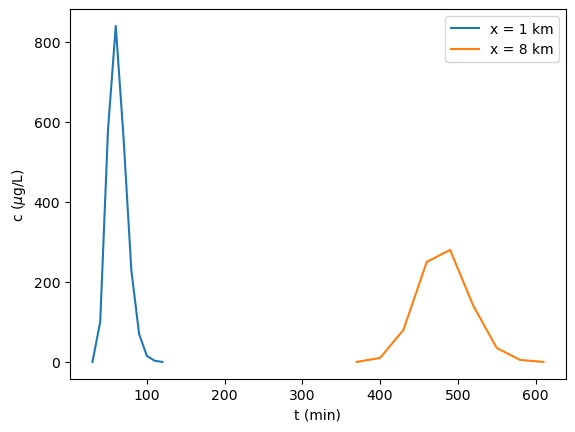

In [11]:
plt.plot(t1,c1,label = 'x = 1 km')
plt.plot(t2,c2, label = 'x = 8 km')
plt.xlabel('t (min)')
plt.ylabel('c ($\mu$g/L)')
plt.legend()

In [25]:
def travel_time(c, t):
    t_bar = np.sum((c[:-1] * t[:-1] + c[1:] * t[1:]) * (t[1:] - t[:-1]))/np.sum((c[:-1]+c[1:])*(t[1:]-t[:-1]))
    return t_bar

def temporal_variance(c, t):
    s_t_square = np.sum((c[:-1] * t[:-1]**2 + c[1:] * t[1:]**2) * (t[1:] - t[:-1]))/np.sum((c[:-1]+c[1:])*(t[1:]-t[:-1])) - travel_time(c, t)**2
    return s_t_square

In [28]:
t1_bar = travel_time(c1, t1)
t2_bar = travel_time(c2, t2)

U = (x2 - x1)/(t2_bar - t1_bar) # m/min
print('Mean velocity = ', U*60*24, 'm/d')

Mean velocity =  24014.3986009722 m/d


In [29]:
s1_square = temporal_variance(c1, t1) # min^2
s2_square = temporal_variance(c2, t2) # min^2

In [31]:
# dispersion coefficient 
E = U**2 * (s2_square - s1_square) / (2*(t2_bar - t1_bar))
print('dispersion coefficient = ', E , 'm^2/min')

dispersion coefficient =  300.1165294559891 m^2/min
